# Unsupervised Learning 

The focus of this exercise is to utilize the hard clustering method k-means in order to ascertain trends in the agaricus-lepiota dataset. Due to the lack of a pre-defined number of clusters or specific grouping criteria, this unsupervised learning approach was chosen. 

**For lower dimension clustering (2-6 clusters), spectral clustering is an accurate method for clustering. 

In order to determine the optimal number of clustrers, a suitable cluster evaluation metric will be used.


## Preprocessing the data

One of the first steps in handling the data is preparing it for the k-means clustering algorithm. As the data starts off as categorical data, it will need to be transformed using one-hot encoding. 

Furthermore, this dataset has a lot of features and can therefore suffer from the curse of dimensionality. The curse of dimensionality is the problem where models can become too statistically intricate and lead to overfitting; basically, the model is too specific to the training set that it is unable to adapt to other sets. One way of solving this problem and to effectivize the training of the model is through dimension reduction. As seen in the previous exercise, there are various ways to perform dimension reduction such as principal component analysis (PCA). A widely used technique to perform PCA is through the use of singular value decompositon (SVD).

The first issue to tackle is therefore how many components the features should be reduced to. There exists multiple ways of determining an appropriate number of components. However, the <b>Explained Variance</b> is often used in order to evaluate the number of components. Additionally, one may create a <b>Scree Plot</b>; in this plot, the explained variance is the dependent variable and the number of components is the independent variable. The "elbow" of the plot is often chosen.

Text(0.5, 1.0, 'Scree Plot')

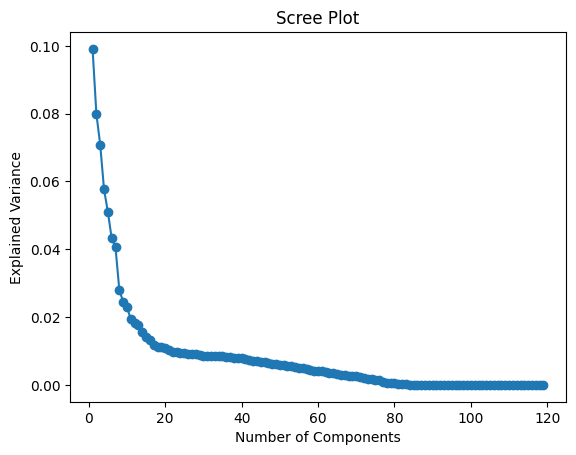

In [89]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


agar_df = pd.read_csv("agaricus-lepiota.data")
X = pd.get_dummies(agar_df, dtype=float)

# Since clustering algorithms such as k-means can be sensitive to large ranges in data, it is important to normalize it beforehand.
scaler = StandardScaler()
X = scaler.fit_transform(X)


pca = PCA()
pca.fit(X) 
Xpca = pca.transform(X)

explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')

Based on the scree plot, it seems the optimal number of components is around 10-20. Therefore, I will be using 16 components moving forward.

## Cluster Evaluation

A suitable cluster evaluaton metric for a dataset with a significant portion of categorical data is the silhouette score or silhouette coefficient. The Silhouette Coefficient (SC) basically looks at the distances between identified clusters as well as the data points within a cluster. SC can therefore only range between -1 and 1. If the coefficient comes close to -1, it means the clusters have been incorrectly assigned. However, the closer the score is to 1, the more distinct the clusters are.


Text(0.5, 1.0, 'Cluster Evaluation using Silhouette Coefficient')

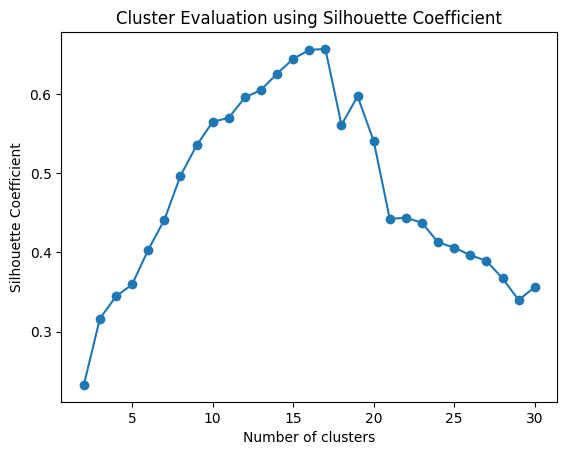

In [90]:
# Plot the silhouette coefficient for k-means with k going from 2 - 30.
%matplotlib inline
from sklearn import decomposition
from sklearn.metrics import silhouette_score

num_components = 16

pca = decomposition.PCA(n_components=num_components)
pca.fit(X)
X = pca.transform(X)


sc = []
num_clusters = []
for i in range(2, 31):
    num_clusters.append(i)
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    sc.append(silhouette_score(X, y_kmeans))


plt.plot(num_clusters, sc, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Cluster Evaluation using Silhouette Coefficient')


Based on the silhouette coefficients for k-means clustering with 2-30 clusters, it seems that 17 is the most distinctive amount of clusters.

## Visualizing the clusters 

Now that we have finally found a suitable number of clusters, it would be fantastic if we could visualize them. Although we have found that an appropriate number of principal components for analysis is 16, it is impossible to visualize this many dimensions. Therefore, a final dimension reduction to 2 dimensions will be done for visualization purposes.

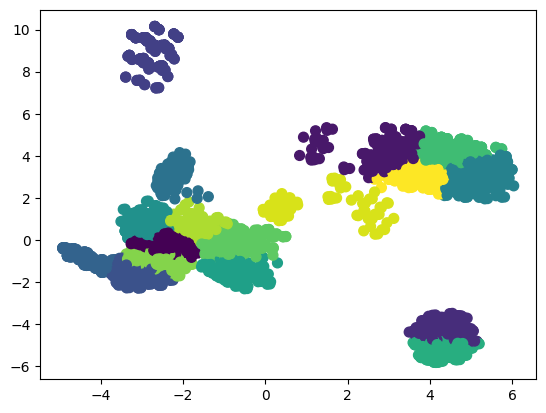

In [99]:
kmeans = KMeans(n_clusters=17, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    

# # Interpret the results
# labels = kmeans.labels_
# agar_df['cluster'] = labels

# # agar_df.describe()


# plt.scatter(agar_df['edibility'], agar_df['cluster'], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

